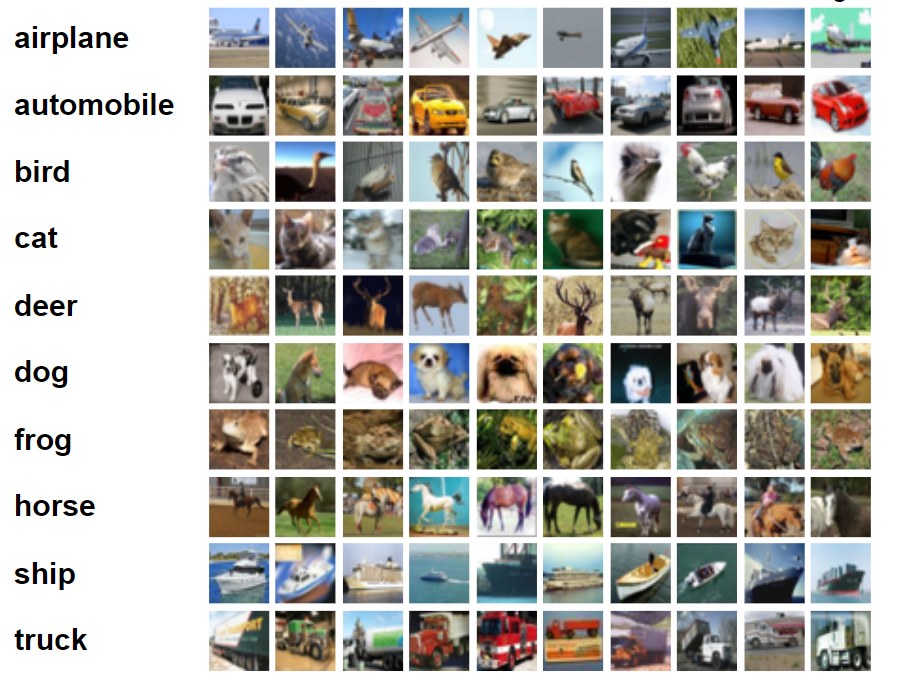

In [89]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb
import tensorflow as tf

In [3]:
classes = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
len(classes)

10

# Getting and understanding the data

In [4]:
(x_train,y_train),(x_test,y_test)= tf.keras.datasets.cifar10.load_data()

In [5]:
print('shape=',x_train.shape)
print('x[0]:\n',x_train[0] ) 

shape= (50000, 32, 32, 3)
x[0]:
 [[[ 59  62  63]
  [ 43  46  45]
  [ 50  48  43]
  ...
  [158 132 108]
  [152 125 102]
  [148 124 103]]

 [[ 16  20  20]
  [  0   0   0]
  [ 18   8   0]
  ...
  [123  88  55]
  [119  83  50]
  [122  87  57]]

 [[ 25  24  21]
  [ 16   7   0]
  [ 49  27   8]
  ...
  [118  84  50]
  [120  84  50]
  [109  73  42]]

 ...

 [[208 170  96]
  [201 153  34]
  [198 161  26]
  ...
  [160 133  70]
  [ 56  31   7]
  [ 53  34  20]]

 [[180 139  96]
  [173 123  42]
  [186 144  30]
  ...
  [184 148  94]
  [ 97  62  34]
  [ 83  53  34]]

 [[177 144 116]
  [168 129  94]
  [179 142  87]
  ...
  [216 184 140]
  [151 118  84]
  [123  92  72]]]


In [6]:
print(y_train[0:5]) # here y is a 2d array which we will convert into a 1d array

[[6]
 [9]
 [9]
 [4]
 [1]]


In [7]:
y_train_reshaped = y_train.reshape(50000,)
y_train_reshaped[0:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [8]:
# normalizing our data
# dont forget to do same chages in both train and test set as your model is trained according to your trained set
x_train_norm = x_train/255
x_test_norm = x_test/255

# using ANN directly

In [9]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (32,32,3)),
    tf.keras.layers.Dense(units = 3000, activation='relu'),
    tf.keras.layers.Dense(units = 1000, activation='relu'),
    tf.keras.layers.Dense(units = 10,activation='sigmoid')
]
)

model.compile(optimizer = 'SGD',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(x_train_norm,y_train_reshaped, epochs=5)



Epoch 1/5


1563/1563 [==============================] - 63s 40ms/step - loss: 1.8181 - accuracy: 0.3526
Epoch 2/5
1563/1563 [==============================] - 59s 38ms/step - loss: 1.6266 - accuracy: 0.4244
Epoch 3/5
1563/1563 [==============================] - 59s 38ms/step - loss: 1.5427 - accuracy: 0.4578
Epoch 4/5
1563/1563 [==============================] - 63s 40ms/step - loss: 1.4858 - accuracy: 0.4776
Epoch 5/5
1563/1563 [==============================] - 63s 40ms/step - loss: 1.4352 - accuracy: 0.4947


In [14]:
y_predicted = model.evaluate(x_test_norm,y_test)

313/313 [==============================] - 2s 7ms/step - loss: 1.4703 - accuracy: 0.4687


# Now lets see CNN

In [34]:
cnn = tf.keras.Sequential([
    # convolution , Relu activation and pooling layers
    tf.keras.layers.Conv2D(filters = 32,kernel_size=(3,3), activation = 'relu', input_shape = (32,32,3)),
    tf.keras.layers.MaxPooling2D((2,2)),
    
    # normal neural network
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units = 64, activation= 'relu'),
    tf.keras.layers.Dense(units = 10, activation= 'softmax')
])

cnn.compile(optimizer='adam',
            loss = 'sparse_categorical_crossentropy',
            metrics=['accuracy'])

# cnn.fit(x_train_norm,y_train_reshaped,epochs=5)

In [35]:
cnn.fit(x_train_norm,y_train_reshaped,epochs=5)

Epoch 1/5
1563/1563 [==============================] - 12s 7ms/step - loss: 1.5075 - accuracy: 0.4620
Epoch 2/5
1563/1563 [==============================] - 11s 7ms/step - loss: 1.2027 - accuracy: 0.5784
Epoch 3/5
1563/1563 [==============================] - 10s 7ms/step - loss: 1.0931 - accuracy: 0.6165
Epoch 4/5
1563/1563 [==============================] - 10s 7ms/step - loss: 1.0236 - accuracy: 0.6425
Epoch 5/5
1563/1563 [==============================] - 11s 7ms/step - loss: 0.9689 - accuracy: 0.6616


# Lets use more layers

In [51]:
cnn2 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters = 32,kernel_size = (3,3), activation = 'relu' , input_shape = (32,32,3)),
    tf.keras.layers.MaxPooling2D((2,2)),
    
    tf.keras.layers.Conv2D(filters = 64,kernel_size = (3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units = 64, activation='relu'),
    tf.keras.layers.Dense(units = 10, activation= 'softmax'),
])

cnn2.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])
cnn2.fit(x_train_norm,y_train_reshaped,epochs = 10)

Epoch 1/10
1563/1563 [==============================] - 13s 8ms/step - loss: 1.4386 - accuracy: 0.4846
Epoch 2/10
1563/1563 [==============================] - 12s 8ms/step - loss: 1.0933 - accuracy: 0.6157
Epoch 3/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.9757 - accuracy: 0.6595
Epoch 4/10
1563/1563 [==============================] - 12s 7ms/step - loss: 0.8921 - accuracy: 0.6902
Epoch 5/10
1563/1563 [==============================] - 13s 9ms/step - loss: 0.8257 - accuracy: 0.7123
Epoch 6/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.7757 - accuracy: 0.7306
Epoch 7/10
1563/1563 [==============================] - 12s 8ms/step - loss: 0.7258 - accuracy: 0.7480
Epoch 8/10
1563/1563 [==============================] - 13s 8ms/step - loss: 0.6822 - accuracy: 0.7630
Epoch 9/10
1563/1563 [==============================] - 13s 8ms/step - loss: 0.6385 - accuracy: 0.7791
Epoch 10/10
1563/1563 [==============================] - 16s 10ms/step - 

In [52]:
cnn.evaluate(x_test_norm,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 1.1069 - accuracy: 0.6240


[1.1068518161773682, 0.6240000128746033]

In [53]:
cnn2.evaluate(x_test_norm,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.9801 - accuracy: 0.6910


[0.9801167845726013, 0.6909999847412109]

In [54]:
y_pred = cnn2.predict(x_test_norm)
y_pred

313/313 [==============================] - 1s 3ms/step


array([[7.2565267e-04, 1.4457941e-05, 4.4699121e-02, ..., 8.9876121e-05,
        4.6667694e-03, 4.2095253e-05],
       [4.1362931e-04, 4.2236608e-02, 1.2365307e-06, ..., 4.2682116e-09,
        9.5362163e-01, 3.7264917e-03],
       [2.2244005e-02, 1.0468287e-02, 4.2484596e-04, ..., 1.0711108e-03,
        9.5429087e-01, 1.0454908e-02],
       ...,
       [1.8449879e-03, 4.8664683e-06, 1.3145620e-01, ..., 1.3473272e-01,
        1.1681095e-03, 7.3511414e-06],
       [3.1366667e-03, 1.4059301e-03, 6.7904532e-02, ..., 9.9893240e-04,
        2.4138397e-05, 2.1977394e-06],
       [9.8032137e-07, 3.6543202e-07, 3.7147605e-05, ..., 9.9899524e-01,
        4.6568058e-08, 4.0828047e-07]], dtype=float32)

In [63]:
y_prediction = [np.argmax(i) for i in y_pred]
len(y_prediction)

10000

In [64]:
y_test_reshaped = y_test.reshape(10000,)

In [83]:
Discription= pd.DataFrame()
Discription['Original_values'] = [classes[i] for i in list(y_test_reshaped)]
Discription['Predicted_values'] = [classes[i] for i in y_prediction]
Discription['Matching'] = y_prediction == y_test_reshaped

In [87]:
Discription.head(100)

,Original_values,Predicted_values,Matching
0,cat,cat,True
1,ship,ship,True
2,ship,ship,True
3,airplane,airplane,True
4,frog,frog,True
...,...,...,...
95,frog,frog,True
96,frog,frog,True
97,airplane,ship,False
98,airplane,airplane,True


In [121]:
def plotting(y_test,y_prediction,index):
    plt.figure(figsize=(15,2))
    plt.imshow(x_test[index])
    plt.xlabel('original value: '+classes[y_test[index,0]])
    plt.ylabel('predicted Value: '+classes[y_prediction[index]])

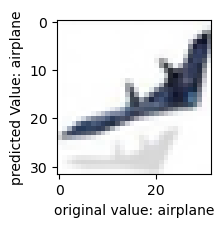

In [124]:
plotting(y_test,y_prediction,7523)